# ERA5 


ERA5 products can be downloaded from https://cds.climate.copernicus.eu/#!/home by using the download method of the corresponding product object. For this example we will have a look at the surface temperature of the ERA5 product on single levels at monthly resolution. 

**Download data**

In [1]:
from datetime import datetime
from pansat.products.reanalysis.era5 import ERA5Monthly

t_0 = datetime(2000, 5, 1, 0)
t_1 = datetime(2000, 9, 1, 0)

# create product instance 
global_srfc_temps = ERA5Monthly('surface', ['2m_temperature'])

In [4]:
files = global_srfc_temps.download(t_0, t_1)

The variable *files* now contains the downloaded files. Now we can open the data of a given file by calling the *ERA5Product.open()* method. This will return an xarray dataset object, which is easy to handle. 

In [6]:
temp_data = global_srfc_temps.open(filename = files[0])

# display xarray dataset object with its dimensions, coordinates, variables and attributes:
display(temp_data)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-05-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-19 19:19:23 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

**Plot data** 

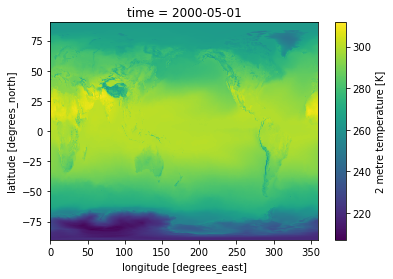

In [7]:
# using xarrays inbuild plot function 
temp_data.t2m[0].plot.pcolormesh()

In [8]:
# get data points 
temps = temp_data.t2m[0]
lons = temp_data.longitude
lats = temp_data.latitude

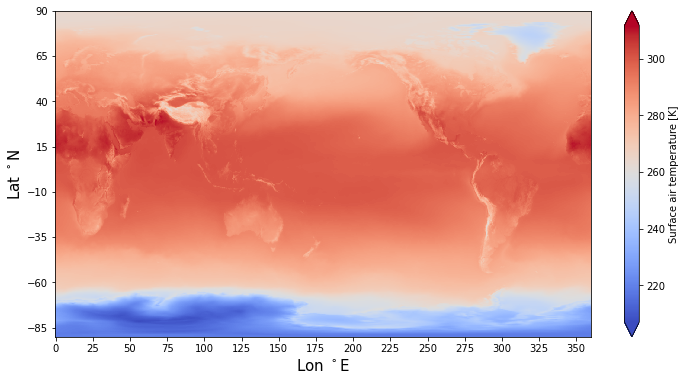

In [9]:
# customize your own plot 
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
fontsize= 15
plt.pcolormesh(lons, lats, temps, shading = 'auto', cmap = 'coolwarm')
plt.colorbar(label="Surface air temperature [K]", extend = 'both')
plt.xticks(lons[::100])
plt.yticks(lats[::100])
plt.xlabel('Lon $^\circ$E', fontsize= fontsize)
plt.ylabel('Lat $^\circ$N', fontsize= fontsize);


**Subset domain**

You may want to subset the dataset, in order to extract a specific region of the globe:

In [5]:
t_0 = datetime(1999, 8, 1, 0)
t_1 = datetime(1999, 9, 1, 0)

# create product instance 
arctic_srfc_temps = ERA5Monthly('surface', ['mean_sea_level_pressure'], [60,90,-179, 180])

# download 
files = arctic_srfc_temps.download(t_0, t_1)

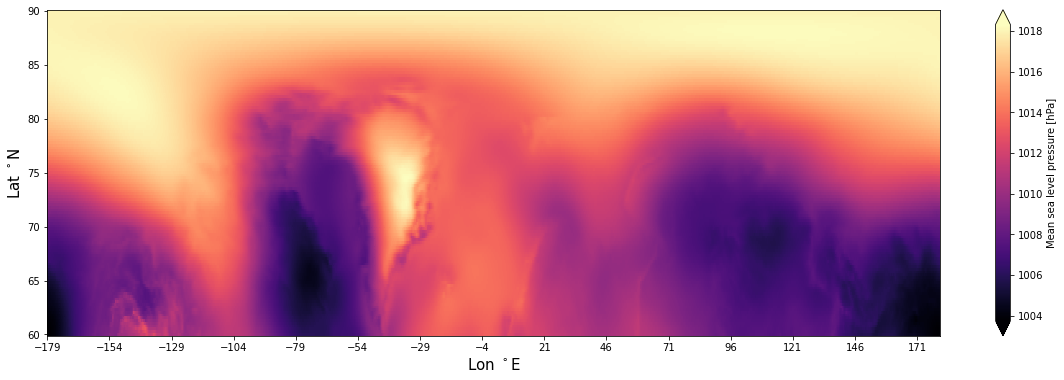

In [10]:
# open file 
arctic_data = arctic_srfc_temps.open(filename = files[0])
# get data points as numpy arrays 
arctic_pressure = arctic_data.msl[0].values
lons = arctic_data.longitude.values
lats = arctic_data.latitude.values 



# customize your own plot 
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize= (20, 6))
fontsize= 15
plt.pcolormesh(lons, lats, arctic_pressure/100, shading = 'auto', cmap = 'magma')
plt.colorbar(label="Mean sea level pressure [hPa]", extend = 'both')
plt.xticks(lons[::100])
plt.yticks(lats[::20])
plt.xlabel('Lon $^\circ$E', fontsize= fontsize)
plt.ylabel('Lat $^\circ$N', fontsize= fontsize);
